In [1]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from image_comression import *
from run_length import *

# Separating into 8x8 blocks

In [2]:
image_array = cv2.resize(cv2.imread("D:\sem_7\Image_and_video_coding\Video_codec\\video-codec\Pattern.jpg",0), (640, 640))
blocks = get_blocks(image_array)

640 640
0 0


In [ ]:
plt.imshow(blocks[0],cmap="gray")
# print(image_array.shape)

In [3]:
dct_blocks = get_dct_blocks(blocks)

In [ ]:
plt.imshow(dct_blocks[0])

In [4]:
high_quntized_blocks = quantize_blocks(dct_blocks,"high")
low_quntized_blocks = quantize_blocks(dct_blocks,"low")
mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")

# Run length coding

In [5]:
result_string_high = compress_run_length_blocks(high_quntized_blocks,"run_length_high.txt")
result_string_mid = compress_run_length_blocks(mid_quntized_blocks,"run_length_mid.txt")
result_string_low = compress_run_length_blocks(low_quntized_blocks,"run_length_low.txt")

In [6]:
compressed_file_size_high = (len(result_string_high)/8000)
compressed_file_size_mid = (len(result_string_mid)/8000)
compressed_file_size_low = (len(result_string_low)/8000)

previos_file_size = (640*640*8)/8000

compression_ratio_high = previos_file_size/compressed_file_size_high
compression_ratio_mid = previos_file_size/compressed_file_size_mid
compression_ratio_low = previos_file_size/compressed_file_size_low

print(f"Previous file size - {previos_file_size} kb")
print(f"Compressed file size high- {compressed_file_size_high} kb")
print(f"Compressed file size mid- {compressed_file_size_mid} kb")
print(f"Compressed file size low- {compressed_file_size_low} kb")
print(f"Compression Ratio high- {compression_ratio_high}")
print(f"Compression Ratio mid- {compression_ratio_mid}")
print(f"Compression Ratio low- {compression_ratio_low}")

Previous file size - 409.6 kb
Compressed file size high- 163.4505 kb
Compressed file size mid- 76.438 kb
Compressed file size low- 34.893125 kb
Compression Ratio high- 2.505957461127375
Compression Ratio mid- 5.358591276590178
Compression Ratio low- 11.738702108223325


In [7]:
result_blocks_high = decompress_run_length_blocks("run_length_high.txt")
result_blocks_mid = decompress_run_length_blocks("run_length_mid.txt")
result_blocks_low = decompress_run_length_blocks("run_length_low.txt")

In [8]:
reconstructed_high = reconstruct_from_blocks(result_blocks_high)
reconstructed_low = reconstruct_from_blocks(result_blocks_low)
reconstructed_mid = reconstruct_from_blocks(result_blocks_mid)

Calculating PSNR values of three levels

In [9]:
PSNR_high = calculate_psnr(image_array,reconstructed_high)
PSNR_mid = calculate_psnr(image_array,reconstructed_mid)
PSNR_low = calculate_psnr(image_array,reconstructed_low)

print(f"PSNR high - {PSNR_high}")
print(f"PSNR mid - {PSNR_mid}")
print(f"PSNR low - {PSNR_low}")

PSNR high - 2.784367930696305
PSNR mid - 2.327607968091096
PSNR low - 2.2449450236654296


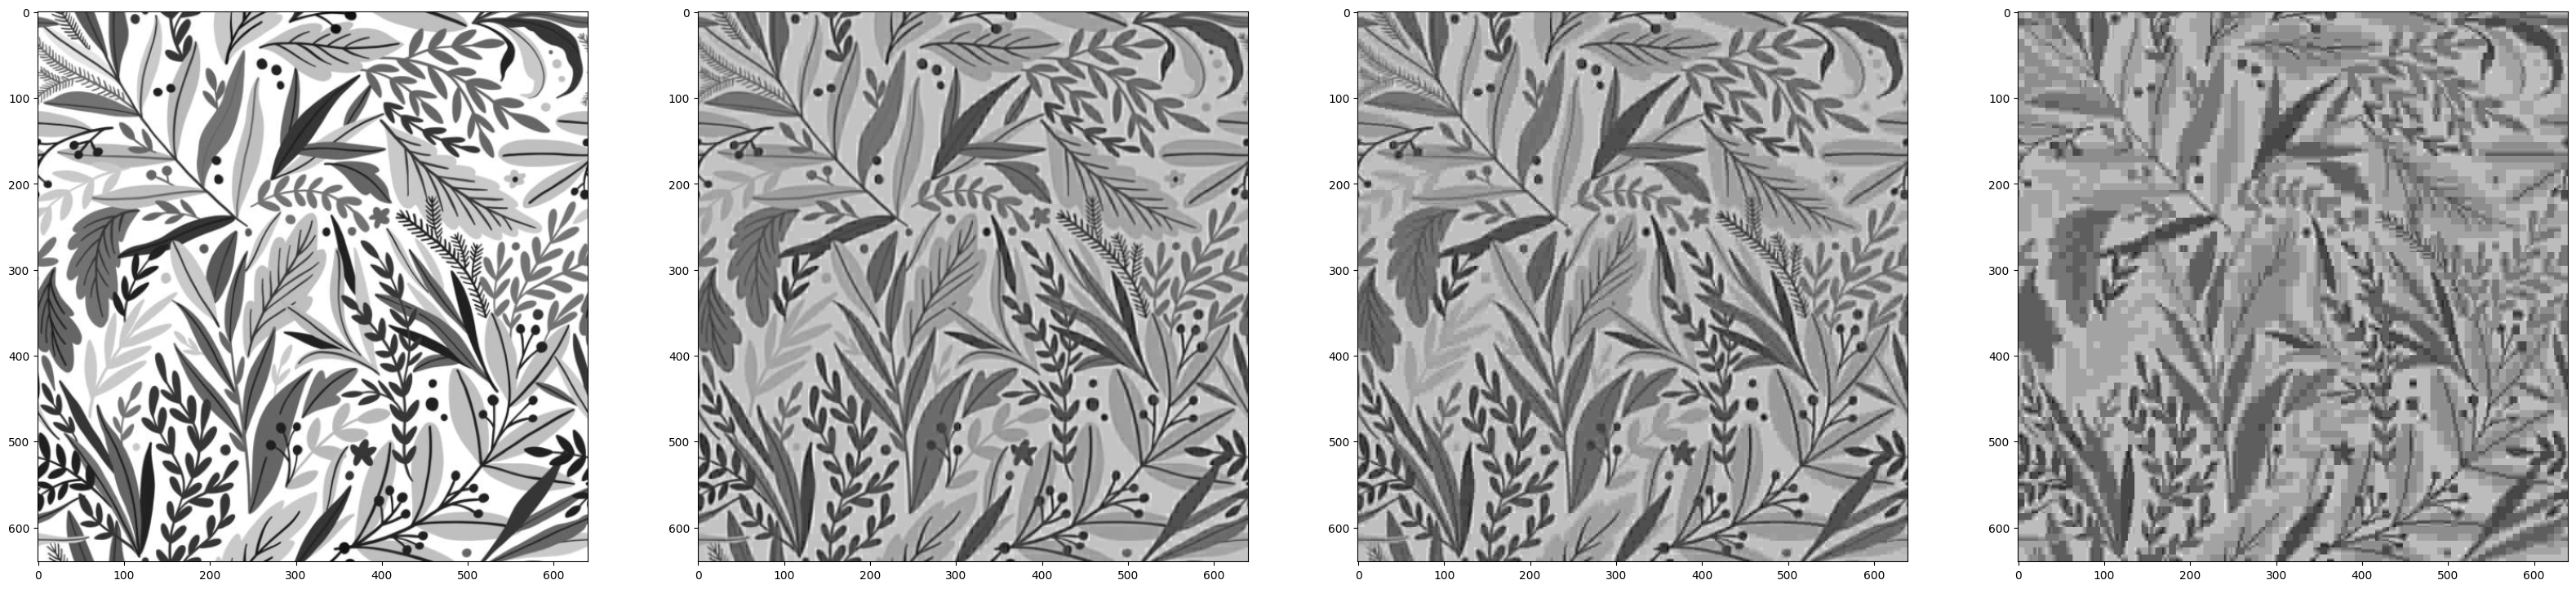

In [10]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(40, 24))  # Adjust figsize as needed
ax1.imshow(image_array, cmap="gray")
ax2.imshow(reconstructed_high, cmap="gray")
ax3.imshow(reconstructed_mid, cmap="gray")
ax4.imshow(reconstructed_low, cmap="gray")

# Adjusting the quility for a required bit rate

In [ ]:
quntized_blocks = quantize_blocks_custom(dct_blocks,0.141)
result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
compressed_file_size_custom = (len(result_string_custom)/8000)
previos_file_size = (640*640*8)/8000

print(f"Previous file size - {previos_file_size} kb")
print(f"Compressed file size custom- {compressed_file_size_custom} kb")
#required size = 341 kb >> scaler 0.14

In [ ]:
required_rate = 400
current_scaler = 0.5
alpha = 0.005

quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
current_rate = (len(result_string_custom)/8000)
print(current_rate)


In [ ]:
scalers  = []
bitrates = []
while True:
    if current_rate < required_rate:
        current_scaler = current_scaler - alpha
        quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
        result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
        current_rate = (len(result_string_custom)/8000)
        print(current_rate)
        scalers.append(current_scaler)
        bitrates.append(current_rate)
        if current_rate > required_rate:
            break
    
    if current_rate > required_rate:
        current_scaler = current_scaler + alpha
        quntized_blocks = quantize_blocks_custom(dct_blocks,current_scaler)
        result_string_custom= compress_run_length_blocks(quntized_blocks,"run_length_custom.txt")
        current_rate = (len(result_string_custom)/8000)
        print(current_rate)
        scalers.append(current_scaler)
        bitrates.append(current_rate)
        if current_rate < required_rate:
            break

In [ ]:
scalers = np.array(scalers)
bitrates = np.array(bitrates)

In [ ]:
plt.plot(bitrates,scalers)

# Adjusting the quility for a required PSNR